## Exercicio 1

In [2]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy.signal import butter, iirpeak, freqz, TransferFunction
import time

In [33]:
def plot_fft(sinal, fs): ##Função do ultimo projeto
    """
    Plota o gráfico da Transformada de Fourier (FFT) de um sinal.

    Parâmetros:
    - sinal: lista ou array com os valores do sinal no tempo
    - fs: taxa de amostragem em Hz
    """
    # Converter sinal para array NumPy
    sinal = np.array(sinal)
    
    # Número de amostras e vetor de tempo
    N = len(sinal)
    t = np.arange(N) / fs

    # FFT e cálculo da magnitude
    fft_result = np.fft.fft(sinal)
    freqs = np.fft.fftfreq(N, d=1/fs)
    magnitude = np.abs(fft_result)

    # Manter só metade do espectro (frequências positivas)
    half_N = N // 2
    freqs = freqs[:half_N]
    magnitude = magnitude[:half_N]

    # # Plot do sinal no tempo (opcional)
    # plt.figure(figsize=(12, 4))
    # plt.subplot(1, 2, 1)
    # plt.plot(t, sinal)
    # plt.title("Sinal no tempo")
    # plt.xlabel("Tempo (s)")
    # plt.ylabel("Amplitude")
    # plt.grid(True)

    #Plot do espectro de frequência
    # plt.subplot(1, 2, 2)
    plt.stem(freqs, magnitude, basefmt=" ")
    plt.title("Transformada de Fourier (FFT)")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0,2100)
    plt.grid(True)

In [34]:
def filtro_IIR_ordem2(signal, tf):
    # Obtém os coeficientes do numerador e denominador
    b = tf.num  # Coeficientes do numerador
    a = tf.den  # Coeficientes do denominador

    # Inicializa o vetor de saída com zeros
    y = [0] * len(signal)
    
    # Aplica a fórmula do filtro IIR
    for n in range(2, len(signal)):
        y[n] = - (a[1] * y[n-1]) - (a[2] * y[n-2]) + (b[0] * signal[n]) + (b[1] * signal[n-1]) + (b[2] * signal[n-2])
    
    return y

o meu sinal é [ 0.          0.14776582  0.28966953 ... -0.4202586  -0.28966953
 -0.14776582]
o meu sinal é [ 0.          0.          0.00106178 ... -0.89475279 -0.90505112
 -0.91207319]


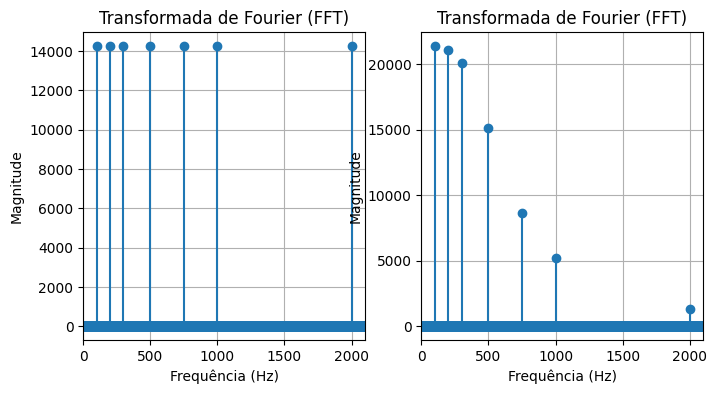

In [35]:
# Parâmetros desejados
fs = 44100  # Taxa de amostragem (Hz)
fc = 500    # Frequência de corte (Hz)
ordem = 2   # Ordem do filtro

# Filtro passa-baisignalas Butterworth
b_lp, a_lp = butter(N=ordem, Wn=fc / (fs / 2), btype='low')

# Coeficientes do filtro
b_lp, a_lp

tf = TransferFunction(b_lp, a_lp, dt=1/fs)

# Fazer os sinais
segundos=3
frequencia_escolhida=[100,300,500,200,750,1000,2000]

t = np.linspace(0, segundos, int(fs * segundos), endpoint=False)  # Vetor de tempo
# Gerar a soma das signals para as 3 frequências do acorde
signal = sum(0.5 * np.sin(2 * np.pi * frequencia * t) for frequencia in frequencia_escolhida)
# Normalizar o sinal para evitar clipping
signal = signal / np.max(np.abs(signal))

# Plotar o sinal no tempo


#Faz a filtragem
signal_filter=filtro_IIR_ordem2(signal,tf)
signal_filter = signal_filter / np.max(np.abs(signal_filter))
print(f'o meu sinal é {signal}')
print(f'o meu sinal é {signal_filter}')


plt.figure(figsize=(8,4))
plt.subplot(121)
plot_fft(signal, fs)
plt.subplot(122)
plot_fft(signal_filter,fs)
plt.show()

## Exercicio 5

#### O fator (variável Q) pode ser definido como o limitador de margem em volta da frequência escolhida, quanto maior o Q, maior a seletividade do filtro, sendo mais refinado, atenuando cada vez mais faixas no entorno e permitindo a passagem de poucas frequencias em torno da escolhida


## Exercicio 6

#### O fator (variável Q) atua de maneira semelhante ao Q do passa faixa, mas com o efeito contrário, quanto maior for seu valor, menor se torna a faixa que será suprimida (atenuada), permitindo uma seletividade maior na hora do filtro. 

#### Uma boa aplicação para o filtro é utiliza-lo para proteção de sistemas, para a proteção de uma frequencia que poderia danificar ou interferir em algum processo, atenuar essa faixa é de grande interesse
